In [1]:
import joblib
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("dataset/train_data.csv")
test = pd.read_csv("dataset/test_data.csv")
print(train.shape)
print(test.shape)

(318438, 18)
(137057, 17)


In [3]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
train.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [5]:
train.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [7]:
train.drop(['case_id', 'patientid', 'Ward_Type', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient'], axis=1, inplace=True)

In [8]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,radiotherapy,F,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,radiotherapy,F,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,anesthesia,E,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,radiotherapy,D,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,radiotherapy,D,Trauma,Extreme,2,51-60,5558.0,41-50


### Convert Healthcare data to numerical format

In [9]:
# def Convert_to_Num(df):
#     dept_lst = df["Department"].unique()
#     dept_lst.sort()
#     dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
#     df.Department.replace(dept_dict, inplace=True)
#     print(dept_dict)
    
#     HRC_lst = df["Hospital_region_code"].unique()
#     HRC_lst.sort()
#     HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
#     df.Hospital_region_code.replace(HRC_dict, inplace=True)
#     print(HRC_dict)
    
#     ward_lst = df["Ward_Type"].unique()
#     ward_lst.sort()
#     ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
#     df.Ward_Type.replace(ward_dict, inplace=True)
#     print(ward_dict)
    
#     WFC_lst = df["Ward_Facility_Code"].unique()
#     WFC_lst.sort()
#     WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
#     df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
#     print(WFC_dict)
    
#     TOA_lst = df["Type of Admission"].unique()
#     TOA_lst.sort()
#     TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
#     df["Type of Admission"].replace(TOA_dict, inplace=True)
#     print(TOA_dict)
   
#     SOI_lst = df["Severity of Illness"].unique()
#     SOI_lst.sort()
#     SOI_dict = dict(zip(SOI_lst, range(len(SOI_lst))))
#     df["Severity of Illness"].replace(SOI_dict, inplace=True)
#     print(SOI_dict)
    
#     age_lst = df["Age"].unique()
#     age_lst.sort()
#     age_dict = dict(zip(age_lst, range(len(age_lst))))
#     df["Age"].replace(age_dict, inplace=True)
#     print(age_dict)
    
#     HTC_lst = df["Hospital_type_code"].unique()
#     HTC_lst.sort()
#     HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
#     df["Hospital_type_code"].replace(HTC_dict, inplace=True)
#     print(HTC_dict)
    
# Convert_to_Num(train)
# stay_list = train["Stay"].unique()
# stay_list.sort()
# dept_Stay = dict(zip(stay_list, range(len(stay_list))))
# train["Stay"].replace(dept_Stay, inplace=True)
# print(dept_Stay)

In [10]:
cat_cols=[]
num_cols=[]
for col in train.columns:
    if train[col].dtypes=='object':
        cat_cols.append(col)
for col in train.columns:
    if train[col].dtypes!='object':
        num_cols.append(col)
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Visitors with Patient', 'Admission_Deposit']


In [11]:
cat_cols.remove('Stay')

In [12]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,radiotherapy,F,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,radiotherapy,F,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,anesthesia,E,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,radiotherapy,D,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,radiotherapy,D,Trauma,Extreme,2,51-60,5558.0,41-50


In [13]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cat_cols.append('City_Code_Hospital')
for col in cat_cols:
    train[col]= le.fit_transform(train[col])

In [14]:
from joblib import dump
dump(le, 'le_encoder_stay.bin')

['le_encoder_stay.bin']

In [15]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'City_Code_Hospital']

In [16]:
train[cat_cols]

,Hospital_type_code,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,City_Code_Hospital
0,2,2,3,5,0,0,5,2
1,2,2,3,5,1,0,5,4
2,4,0,1,4,1,0,5,0
3,1,1,3,3,1,0,5,1
4,1,1,3,3,1,0,5,1
...,...,...,...,...,...,...,...,...
318433,0,0,3,5,0,2,4,5
318434,0,0,1,4,2,2,8,0
318435,0,0,2,5,0,1,7,3
318436,1,1,1,3,1,1,1,1


In [17]:
train['City_Code_Hospital'].value_counts()

0     55351
1     51809
5     46991
6     35463
2     31569
4     31105
7     26277
9     17137
3     13857
8      5249
10     3630
Name: City_Code_Hospital, dtype: int64

In [18]:
num_cols

['Hospital_code',
 'City_Code_Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [19]:
num_cols.remove('City_Code_Hospital')
num_cols

['Hospital_code', 'Visitors with Patient', 'Admission_Deposit']

In [20]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
train[num_cols]= ss.fit_transform(train[num_cols].values)

In [21]:
dump(ss, 'std_scaler_stay.bin')

['std_scaler_stay.bin']

In [22]:
train[num_cols].head(5)

,Hospital_code,Visitors with Patient,Admission_Deposit
0,-1.195176,-0.727923,0.027835
1,-1.890124,-0.727923,0.987556
2,-0.963527,-0.727923,-0.124910
3,0.889668,-0.727923,2.200319
4,0.889668,-0.727923,0.623175


In [23]:
from sklearn.model_selection import train_test_split
y= train[['Stay']]
X= train.drop(['Stay'], axis=1)

In [24]:
y

,Stay
0,0-10
1,41-50
2,31-40
3,41-50
4,41-50
...,...
318433,11-20
318434,31-40
318435,11-20
318436,11-20


In [25]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

In [26]:
print(f'The shape of X_Train - {X_train.shape}')
print(f'The shape of X_test - {X_test.shape}')
print(f'The shape of y_train - {y_train.shape}')
print(f'The shape of y_test - {y_test.shape}')

The shape of X_Train - (254750, 11)
The shape of X_test - (63688, 11)
The shape of y_train - (254750, 1)
The shape of y_test - (63688, 1)


In [27]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(X_test,
                    y_test)

model = CatBoostClassifier(iterations=150,
                           learning_rate=0.03,
                           depth=10,
                           l2_leaf_reg = 3,
                           loss_function='MultiClass',
                           eval_metric='MultiClass')

model.fit(X_train,
          y_train,
          eval_set=eval_dataset,
          verbose=True)

0:	learn: 2.3528387	test: 2.3531159	best: 2.3531159 (0)	total: 1.57s	remaining: 3m 53s
1:	learn: 2.3105546	test: 2.3110180	best: 2.3110180 (1)	total: 2.35s	remaining: 2m 53s
2:	learn: 2.2726708	test: 2.2733645	best: 2.2733645 (2)	total: 3.03s	remaining: 2m 28s
3:	learn: 2.2372694	test: 2.2380916	best: 2.2380916 (3)	total: 3.71s	remaining: 2m 15s
4:	learn: 2.2054294	test: 2.2064687	best: 2.2064687 (4)	total: 4.43s	remaining: 2m 8s
5:	learn: 2.1758768	test: 2.1770955	best: 2.1770955 (5)	total: 5.17s	remaining: 2m 3s
6:	learn: 2.1486744	test: 2.1501153	best: 2.1501153 (6)	total: 5.87s	remaining: 2m
7:	learn: 2.1230370	test: 2.1246742	best: 2.1246742 (7)	total: 6.59s	remaining: 1m 57s
8:	learn: 2.1004363	test: 2.1020970	best: 2.1020970 (8)	total: 6.83s	remaining: 1m 46s
9:	learn: 2.0775655	test: 2.0794465	best: 2.0794465 (9)	total: 7.54s	remaining: 1m 45s
10:	learn: 2.0566048	test: 2.0586753	best: 2.0586753 (10)	total: 8.23s	remaining: 1m 43s
11:	learn: 2.0367504	test: 2.0390984	best: 2.03

94:	learn: 1.6416037	test: 1.6561129	best: 1.6561129 (94)	total: 1m 6s	remaining: 38.8s
95:	learn: 1.6408776	test: 1.6555637	best: 1.6555637 (95)	total: 1m 7s	remaining: 38.1s
96:	learn: 1.6402081	test: 1.6550652	best: 1.6550652 (96)	total: 1m 8s	remaining: 37.3s
97:	learn: 1.6393785	test: 1.6544957	best: 1.6544957 (97)	total: 1m 9s	remaining: 36.6s
98:	learn: 1.6386706	test: 1.6539121	best: 1.6539121 (98)	total: 1m 9s	remaining: 36s
99:	learn: 1.6380410	test: 1.6534164	best: 1.6534164 (99)	total: 1m 10s	remaining: 35.3s
100:	learn: 1.6373593	test: 1.6528690	best: 1.6528690 (100)	total: 1m 11s	remaining: 34.6s
101:	learn: 1.6367347	test: 1.6523959	best: 1.6523959 (101)	total: 1m 12s	remaining: 33.9s
102:	learn: 1.6360446	test: 1.6518678	best: 1.6518678 (102)	total: 1m 12s	remaining: 33.2s
103:	learn: 1.6351803	test: 1.6512582	best: 1.6512582 (103)	total: 1m 13s	remaining: 32.5s
104:	learn: 1.6344225	test: 1.6505914	best: 1.6505914 (104)	total: 1m 14s	remaining: 31.8s
105:	learn: 1.6338

In [28]:
print(model.get_best_score())

{'learn': {'MultiClass': 1.613680305458899}, 'validation': {'MultiClass': 1.6367285219254417}}


In [29]:
cm = get_confusion_matrix(model, eval_dataset)
print(cm)

[[5.1600e+02 2.0480e+03 1.9680e+03 1.3000e+02 0.0000e+00 5.9000e+01
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.8000e+02 6.1740e+03 7.7230e+03 8.2000e+02 0.0000e+00 6.2700e+02
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 4.0000e+00]
 [2.4200e+02 4.1530e+03 1.1872e+04 6.3100e+02 0.0000e+00 5.7900e+02
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.1000e+01]
 [1.4300e+02 2.0400e+03 5.2620e+03 1.5670e+03 0.0000e+00 1.9770e+03
  0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 4.2000e+01]
 [6.0000e+01 3.9000e+02 1.5530e+03 1.3600e+02 0.0000e+00 1.8800e+02
  0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.2000e+01]
 [6.0000e+01 7.1300e+02 2.0050e+03 1.1750e+03 0.0000e+00 2.9270e+03
  0.0000e+00 2.0000e+00 6.0000e+00 0.0000e+00 1.1600e+02]
 [1.3000e+01 5.6000e+01 3.3700e+02 4.1000e+01 0.0000e+00 8.8000e+01
  0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.3000e+01]
 [1.8000e+01 1.5300e+02 5.3500e+02 2.8800e+02 0.0000e+00 9.2400e+02
  0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00 1.27

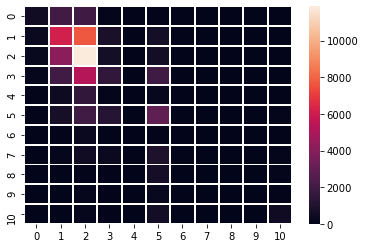

In [30]:
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()

In [31]:
print(f"catboost Acc : {predict_accuracy_on_test_set * 100}%")

catboost Acc : 74.18496340652028%


In [32]:
# on Test Data

In [33]:
test= pd.read_csv('dataset/test_data.csv')
test.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [34]:
test.shape

(137057, 17)

In [35]:
test.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [36]:
test['City_Code_Patient'].fillna(statistics.mode(test['City_Code_Patient']),inplace=True)

In [37]:
test.drop(['case_id', 
           'patientid', 
           'Available Extra Rooms in Hospital', 
           'Bed Grade', 
           'City_Code_Patient', 
           'Ward_Type'], axis=1, inplace=True
         )

In [38]:
test.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,21,c,3,Z,gynecology,A,Emergency,Moderate,2,71-80,3095.0
1,29,a,4,X,gynecology,F,Trauma,Moderate,4,71-80,4018.0


In [39]:
cat_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'City_Code_Hospital']

In [40]:
for col in cat_cols:
    test[col]= le.fit_transform(test[col])

In [41]:
test[num_cols]= ss.transform(test[num_cols].values)

In [42]:
test.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Department,Ward_Facility_Code,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.310544,2,2,2,2,0,0,2,-0.727923,7,-1.643165
1,1.237141,0,3,0,2,5,1,2,0.405826,7,-0.793862
2,0.889668,1,1,1,2,3,0,2,-0.161049,7,-0.357709
3,-1.426825,0,5,0,2,5,1,2,-0.161049,7,-0.651238
4,1.121317,1,9,0,2,5,1,2,0.405826,7,-0.662280


In [43]:
predictions= model.predict(test)

In [44]:
np. set_printoptions(threshold=np. inf)
print(predictions[:30])

[['0-10']
 ['51-60']
 ['21-30']
 ['21-30']
 ['51-60']
 ['21-30']
 ['21-30']
 ['11-20']
 ['21-30']
 ['21-30']
 ['21-30']
 ['51-60']
 ['21-30']
 ['21-30']
 ['11-20']
 ['21-30']
 ['11-20']
 ['51-60']
 ['21-30']
 ['21-30']
 ['21-30']
 ['51-60']
 ['21-30']
 ['11-20']
 ['51-60']
 ['21-30']
 ['21-30']
 ['51-60']
 ['21-30']
 ['31-40']]


In [45]:
# Saving the model
dump(model, 'classsifier_stay.bin')

['classsifier_stay.bin']